<a href="https://colab.research.google.com/github/dsanmartin/ELE050-B/blob/main/06_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage # Para el gráfico de agrupación jerárquica
import seaborn as sns

# Datos sintéticos

In [2]:
N = 128
x1 = np.linspace(-2, 2, N)
# 2 parábolas
y1 = x1 ** 2 + np.random.random(N) - 4
y2 = -x1 ** 2 + np.random.random(N) + 4
# 1 circulo al medio
x2 = np.linspace(-.2, .2, N)
y3 = np.sqrt(.2 - x2**2) + np.random.random(N)
y4 = -np.sqrt(.2 - x2**2) + np.random.random(N)
x = np.concatenate([x1, x1, x2, x2])
y = np.concatenate([y1, y2, y3, y4])
X_s = np.array([x, y]).T
X_s = X_s[np.random.permutation(len(x))] # Permutación

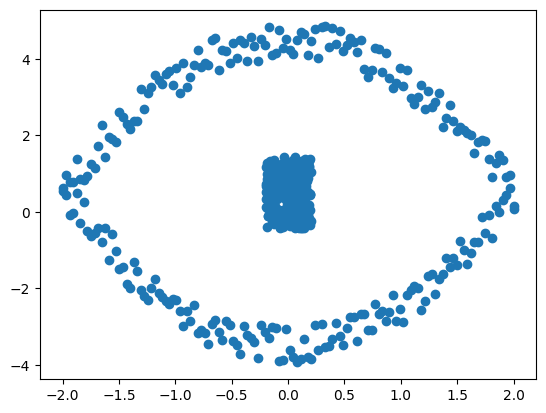

In [3]:
plt.scatter(X_s[:,0], X_s[:,1])
plt.show()

## K-Means

In [4]:
km_s = KMeans(n_clusters=2)
km_s = km_s.fit(X_s)

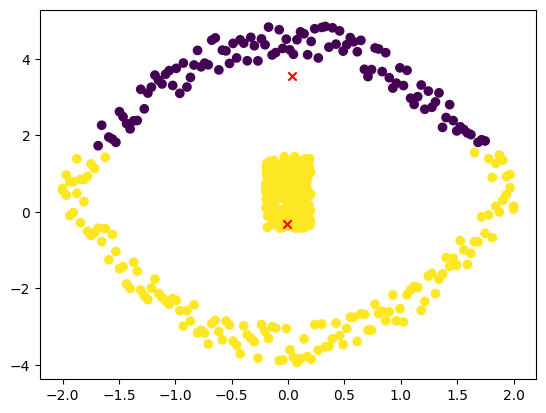

In [5]:
plt.scatter(X_s[:,0], X_s[:,1], c=km_s.labels_)
plt.scatter(km_s.cluster_centers_[:,0], km_s.cluster_centers_[:,1], c='r', marker="x")
plt.show()

## DBSCAN

In [6]:
db_s = DBSCAN(eps=1, min_samples=5)
db_s = db_s.fit(X_s)

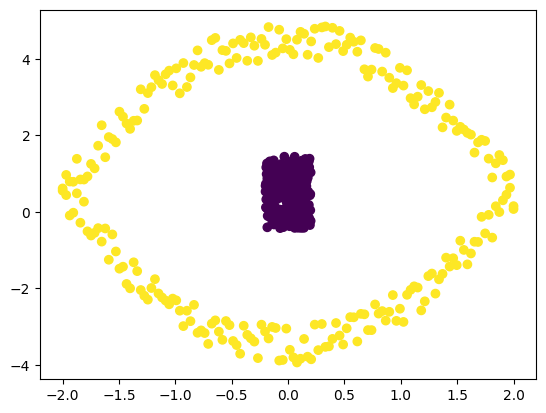

In [7]:
plt.scatter(X_s[:,0], X_s[:,1], c=db_s.labels_)
plt.show()

## Agrupamiento jerárquico

In [8]:
ac_s = AgglomerativeClustering(n_clusters=2)
ac_s = ac_s.fit(X_s)

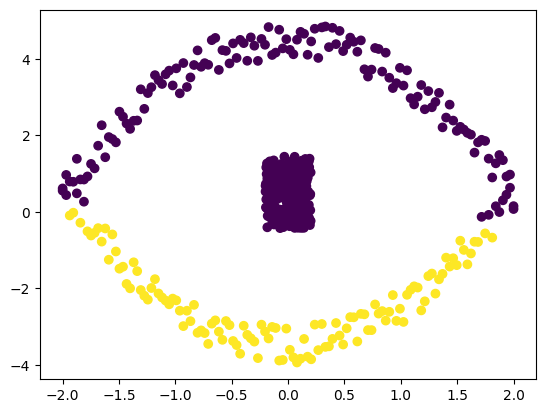

In [9]:
plt.scatter(X_s[:,0], X_s[:,1], c=ac_s.labels_)
plt.show()

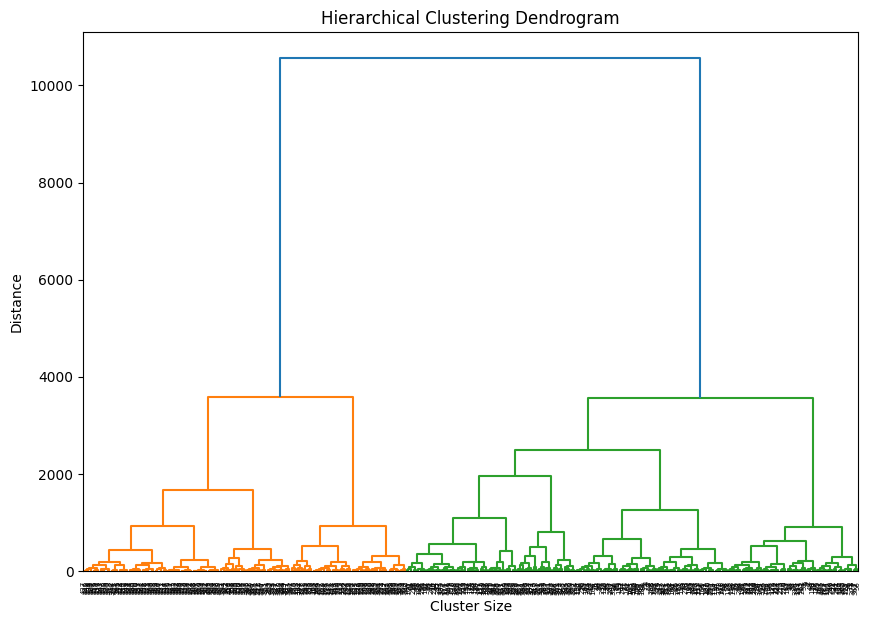

In [10]:
linkage_matrix = linkage(ac_s.children_, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix,
           orientation="top",
           distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

## Evaluación

In [11]:
print("K-Means:", silhouette_score(X_s, km_s.labels_))
print("DBSCAN:", silhouette_score(X_s, db_s.labels_))
print("Jerárquico:", silhouette_score(X_s, ac_s.labels_))

K-Means: 0.5296764994025045
DBSCAN: 0.2893989893156822
Jerárquico: 0.5078165024570119


# Datos reales

In [12]:
X = load_iris(as_frame=True).data

In [13]:
X.shape

(150, 4)

Para mostrar los scatter plots de caad combinación de variables

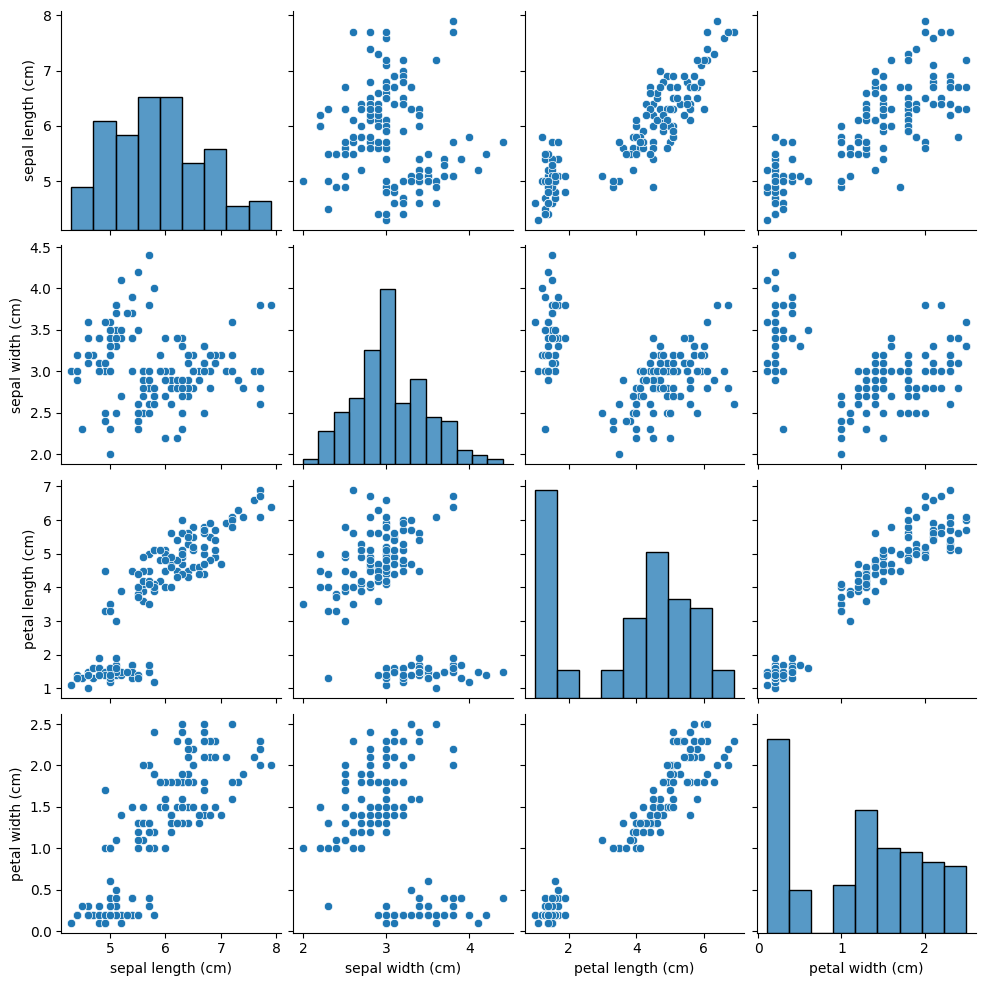

In [14]:
sns.pairplot(X)
plt.show()

## K-Means

In [15]:
k_means = KMeans(n_clusters=5)
k_means = k_means.fit(X)

## DBSCAN

In [16]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan = dbscan.fit(X)

## Jerárquico

In [17]:
agg_cluster = AgglomerativeClustering(n_clusters=5)
agg_cluster = agg_cluster.fit(X)

## Evaluación

In [18]:
print("K-Means:", silhouette_score(X, k_means.labels_))
print("DBSCAN:", silhouette_score(X, dbscan.labels_))
print("Jerárquico:", silhouette_score(X, agg_cluster.labels_))

K-Means: 0.3726790261231255
DBSCAN: 0.6867350732769781
Jerárquico: 0.48438258927906036


## Buscar mejores parámetros

### K-Means


In [19]:
Ks = np.arange(2, 10)
scores_km = np.zeros(Ks.shape[0])
for i, k in enumerate(Ks):
    km_ = KMeans(n_clusters=k)
    km_ = km_.fit(X)
    #scores[i] = k_means.inertia_ # Para el método del codo, pero no es recomendable por ser muy subjetivo
    scores_km[i] = silhouette_score(X, km_.labels_)

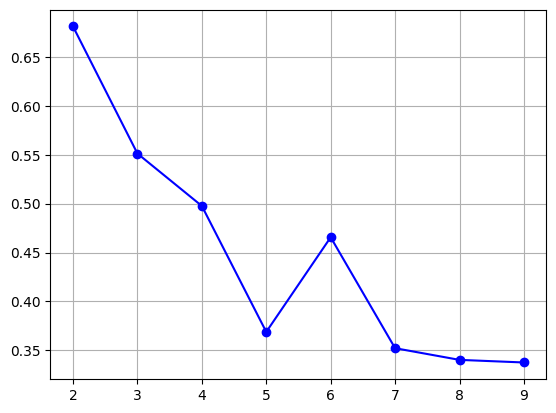

In [20]:
plt.plot(Ks, scores_km, 'b-o')
plt.grid(True)
plt.show()

### DBSCAN

In [21]:
eps = np.linspace(0.5, 1, 10)
points = np.arange(2, 10)
scores_dbscan = np.zeros((eps.shape[0], points.shape[0]))
for i, e in enumerate(eps):
  for j, p in enumerate(points):
    dbs_ = DBSCAN(eps=e, min_samples=p)
    dbs_ = dbs_.fit(X)
    scores_dbscan[i,j] = silhouette_score(X, dbs_.labels_)

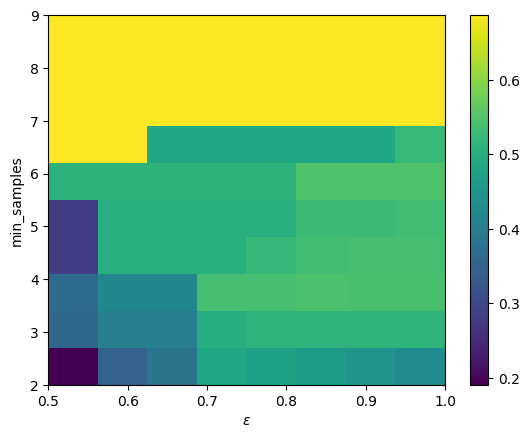

In [22]:
plt.imshow(scores_dbscan, origin="lower", extent=[eps.min(), eps.max(), points.min(), points.max()], aspect='auto')
plt.colorbar()
plt.xlabel(r'$\varepsilon$')
plt.ylabel('min_samples')
plt.show()

### Jerárquica

In [23]:
cls = np.arange(2, 10)
scores_ac = np.zeros(cls.shape[0])
for i, cl in enumerate(cls):
    ac_ = AgglomerativeClustering(n_clusters=cl)
    ac_ = ac_.fit(X)
    scores_ac[i] = silhouette_score(X, ac_.labels_)

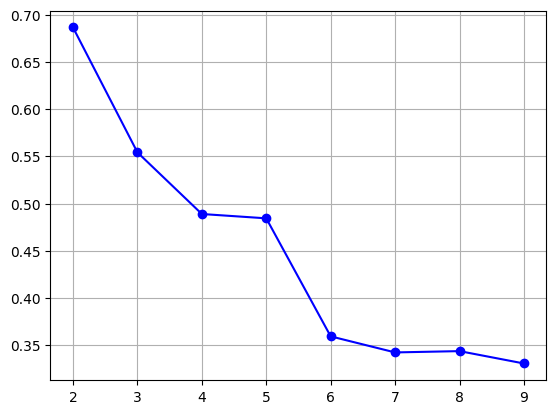

In [24]:
plt.plot(cls, scores_ac, 'b-o')
plt.grid(True)
plt.show()

Al parecer $2$ es el número de grupos óptimo